In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# 1.Read Data File

In [2]:
dataframe = pd.read_csv("Data File/final_model_data.csv")
dataframe = dataframe.rename(columns={'mandeath':'target'})
dataframe = dataframe.drop('Unnamed: 0',axis=1)
dataframe = dataframe.drop('index',axis=1)

sample_data = dataframe.sample(frac=0.1)

y = sample_data['target']
X=sample_data.drop('target',axis=1)
X=X.drop('IX',axis=1)
X=X.drop('X',axis=1)
X=X.drop('XIX',axis=1)
X=X.drop('XX',axis=1)

# 2. Split Data File

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Training

## 3.1 Decision Tree


Score: 

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     10360
         1.0       0.86      0.85      0.85     10438

    accuracy                           0.85     20798
   macro avg       0.85      0.85      0.85     20798
weighted avg       0.85      0.85      0.85     20798

Matthew Corr: 

0.7047115829744481


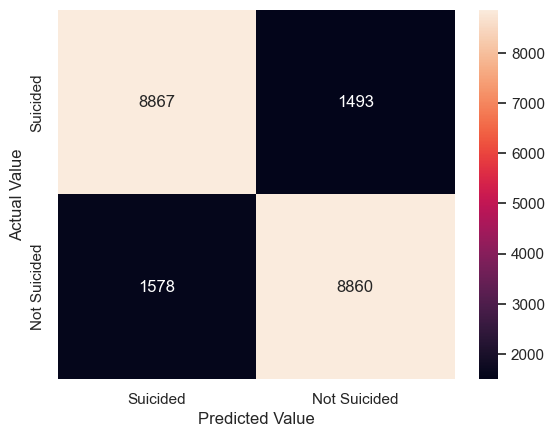

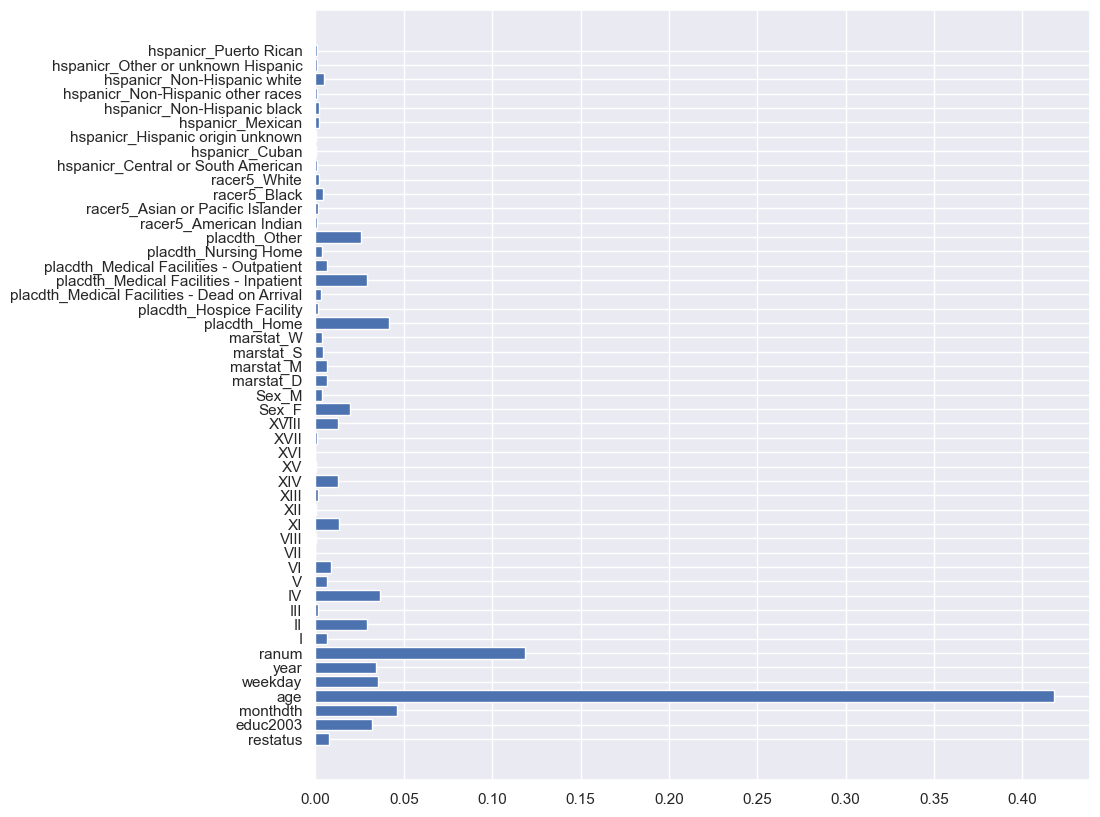

In [4]:
DecisionTree = tree.DecisionTreeClassifier(random_state=12)
DecisionTree = DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
DecisionTree.score(X_test, y_test, sample_weight=None)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))


vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = DecisionTree.feature_importances_
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()

# 3.2 RandomForest

Score: 

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     10360
         1.0       0.89      0.93      0.91     10438

    accuracy                           0.91     20798
   macro avg       0.91      0.91      0.91     20798
weighted avg       0.91      0.91      0.91     20798

Matthew Corr: 

0.8189419802627079


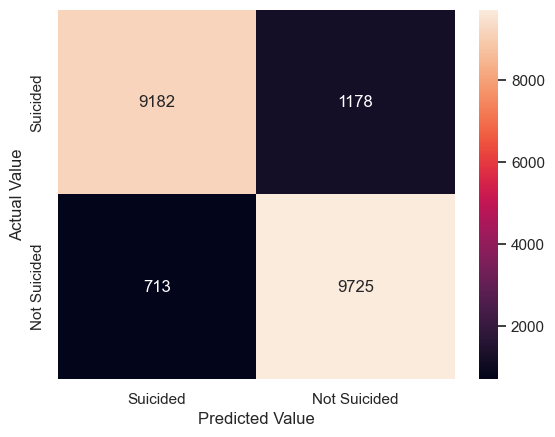

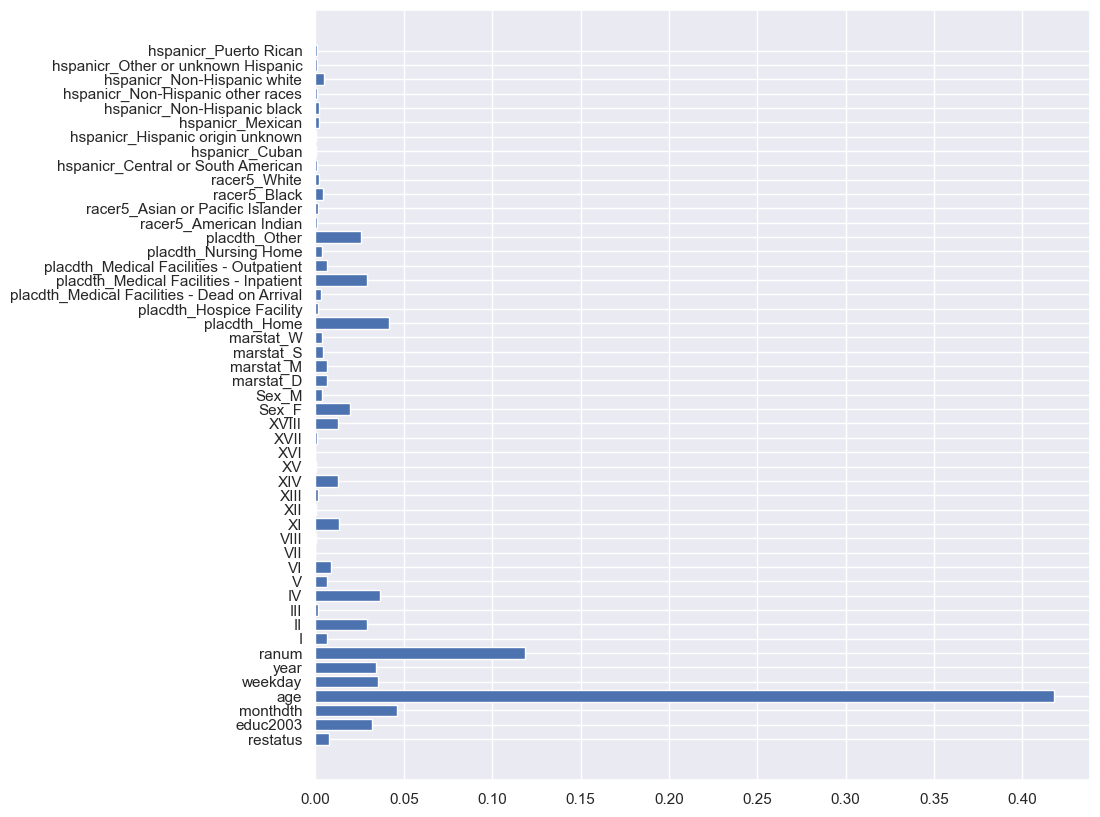

In [6]:

from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(random_state=12)
RandomForest = RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)
RandomForest.score(X_test, y_test, sample_weight=None)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = DecisionTree.feature_importances_
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()



## 3.2 Logistic Regression

/Users/timmy/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     10360
         1.0       0.86      0.88      0.87     10438

    accuracy                           0.87     20798
   macro avg       0.87      0.87      0.87     20798
weighted avg       0.87      0.87      0.87     20798

Matthew Corr: 

0.7359854038469016


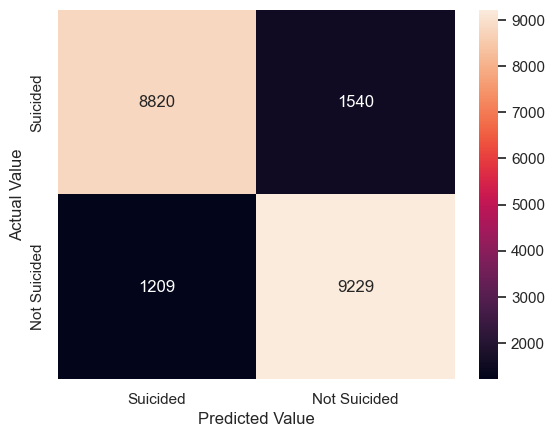

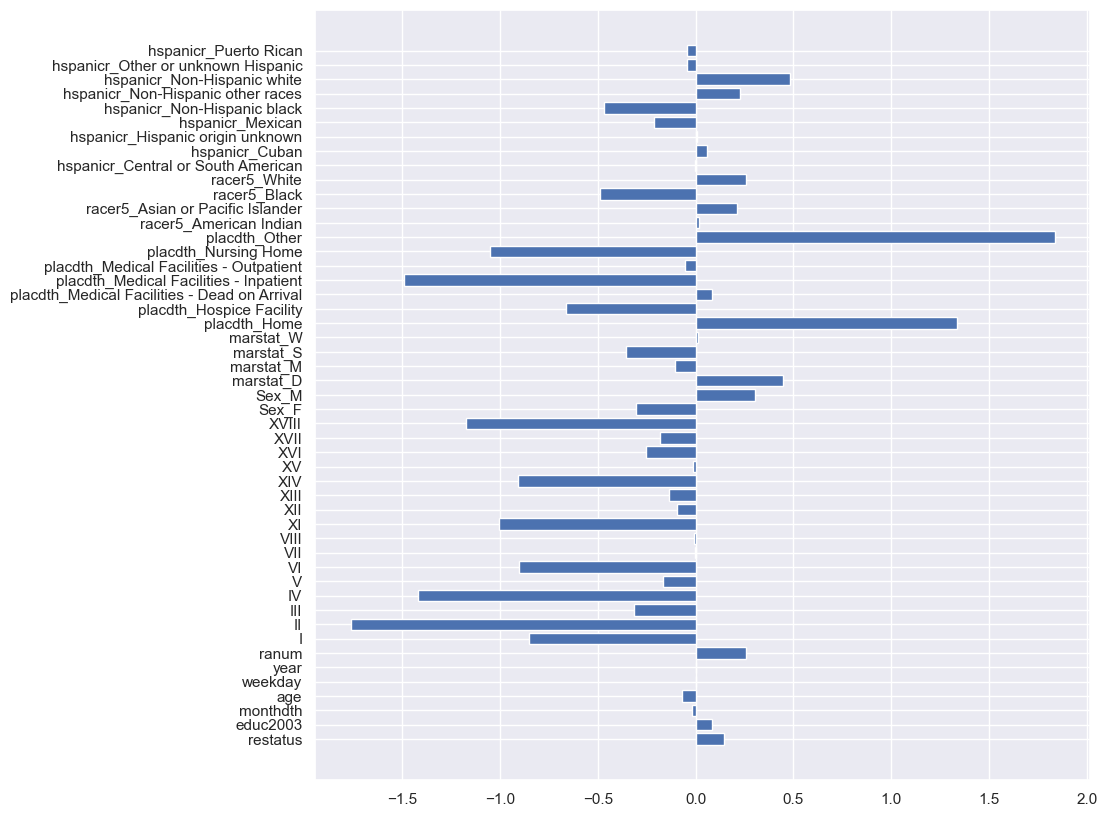

In [7]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',random_state=16)


# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test, sample_weight=None)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = logreg.coef_[0]
importance = vector(importance)
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()

## 3.3 KNN

Score: 

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     10360
         1.0       0.81      0.74      0.77     10438

    accuracy                           0.78     20798
   macro avg       0.78      0.78      0.78     20798
weighted avg       0.78      0.78      0.78     20798

Matthew Corr: 

0.5646088828149605


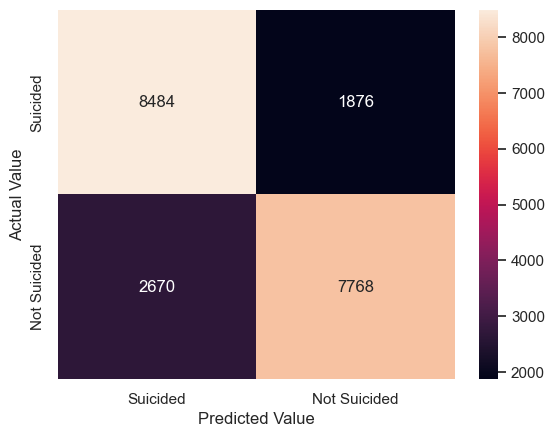

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

## 3.4 SVC

In [10]:
from sklearn.svm import SVC  
clf = SVC(kernel='poly',random_state=10) 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(clf, X, y)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)


Score: 

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     10360
         1.0       0.80      0.76      0.78     10438

    accuracy                           0.79     20798
   macro avg       0.79      0.79      0.79     20798
weighted avg       0.79      0.79      0.78     20798

Matthew Corr: 

0.5707851521726


## 3.5 Naive Bayes

In [1]:
from sklearn.naive_bayes import MultinomialNB
muNB = MultinomialNB(random_state=12)
muNB.fit(X_train, y_train)
y_pred = muNB.predict(X_test)
muNB.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

## 3.6 ComplementNB

In [ ]:
from sklearn.naive_bayes import ComplementNB
cmNB = ComplementNB(random_state=12)
cmNB.fit(X_train, y_train)
y_pred = cmNB.predict(X_test)
cmNB.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

print('Score: \n')
print(metrics.classification_report(y_test, y_pred))
print('Matthew Corr: \n')
print(metrics.matthews_corrcoef(y_test,y_pred))

# Cross-validation

### We are not using K-fold cross-validation here for our case since our dataset is large enough.
### Moreover, theoratically we think K-cross validation can lower the variance to improve the generalization. But actually, the k-folded dataset that we got is not totally independent but has some relativity. How much variance that K-fold cross validation can lower has not been determined yet, it may bring up the bias.

Decision Tree Cross-Validation for hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

parameters = {'max_depth':[3,5,7,9],'min_samples_leaf':[1,2,3,4]}

clf = GridSearchCV(DecisionTreeClassifier(),parameters,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))



Logistic Regression cross-validation model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'liblinear'],
}

clf = GridSearchCV(LogisticRegression(),ignore_warnings=True, parameters,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))



SVC cross-validation model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

clf = GridSearchCV(SVC(),param_grid,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))



Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import RandomForestClassifier
from sklearn import metrics

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(RandomForestClassifier(random_state=10),param_grid,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))

hyperparameter tuning

In [ ]:
LogisticRegressionCV = LogisticRegression()
param_grid_mlp = {
    'penalty': ['l2','l1', 'elasticnet' ], 
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga' ],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'max_iter' : [100]
}

CV_mlp = GridSearchCV(estimator=LogisticRegressionCV, param_grid=param_grid_mlp, cv= 10,n_jobs=-1)
CV_mlp.fit(X_train, y_train)